<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png" align=left alt="CC BY license logo" /><br /><br />
Created by [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
**For questions/comments/improvements, email nathan.kelber@ithaka.org.**<br />
____

# Exploring Metadata and Pre-Processing

**Description of methods in this notebook:**
This [notebook](https://docs.constellate.org/key-terms/#jupyter-notebook) shows how to explore and pre-process the [metadata](https://docs.constellate.org/key-terms/#metadata) of a [dataset](https://docs.constellate.org/key-terms/#dataset) using [Pandas](https://docs.constellate.org/key-terms/#pandas). 

The following processes are described:

* Importing a [CSV file](https://docs.constellate.org/key-terms/#csv-file) containing the [metadata](https://docs.constellate.org/key-terms/#metadata) for a given dataset ID
* Creating a [Pandas](https://docs.constellate.org/key-terms/#pandas) dataframe to view the [metadata](https://docs.constellate.org/key-terms/#metadata)
* Pre-processing your [dataset](https://docs.constellate.org/key-terms/#dataset) by filtering out unwanted texts
* Exporting a list of relevant IDs to a [CSV file](https://docs.constellate.org/key-terms/#csv-file)
* Visualizing the metadata of your pre-processed [dataset](https://docs.constellate.org/key-terms/#dataset) by the number of documents/year and pages/year

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)

[Take me to the **Research Version** of this notebook ->](./exploring-metadata-for-research.ipynb)

**Difficulty:** Intermediate

**Completion time:** 45 minutes

**Knowledge Required:** 
* Python Basics Series ([Start Python Basics 1](./python-basics-1.ipynb))

**Knowledge Recommended:**

* Pandas Series ([Start Pandas 1](./pandas-1.ipynb))

**Data Format:** [CSV file](https://docs.constellate.org/key-terms/#csv-file)

**Libraries Used:**
* [constellate](https://docs.constellate.org/key-terms/#constellate-client) client to retrieve the [metadata](https://docs.constellate.org/key-terms/#metadata) in a [CSV file](https://docs.constellate.org/key-terms/#csv-file)
* [pandas](https://docs.constellate.org/key-terms/#pandas) to manipulate and visualize the metadata

**Research Pipeline:** None
____

## Import your dataset

We'll use the `constellate` client to automatically retrieve the [metadata](https://docs.constellate.org/key-terms/#metadata) for a [dataset](https://docs.constellate.org/key-terms/#dataset). We can retrieve [metadata](https://docs.constellate.org/key-terms/#metadata) in a [CSV file](https://docs.constellate.org/key-terms/#csv-file) using the `get_metadata` method.

Enter a [dataset ID](https://docs.constellate.org/key-terms/#dataset-ID) in the next code cell. 

If you don't have a dataset ID, you can:
* Use the sample dataset ID already in the code cell
* [Create a new dataset](https://constellate.org/builder)
* [Use a dataset ID from other pre-built sample datasets](https://constellate.org/dataset/dashboard)

In [1]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Shakespeare Quarterly, 1950-present
dataset_id = "34eb1175-92d1-4fd3-ca54-438e575b6e64"

Next, import the `constellate` client, passing the `dataset_id` as an argument using the `get_metadata` method.

In [2]:
# Import the `constellate` client
import constellate

# Pull in our dataset CSV using
# The .get_metadata() method downloads the CSV file for our metadata
# to the /data folder and returns a string for the file name and location
# dataset_metadata will be a string containing that file name and location
dataset_metadata = constellate.get_metadata(dataset_id)

# To download the full dataset (up to a limit of 25,000 documents),
# request it first in the builder environment. See the Constellate Client
# documentation at: https://constellate.org/docs/constellate-client
# Then use the `constellate.download` method show below.
# dataset_metadata = constellate.download(dataset_id, 'metadata')

Constellate: use and download of datasets is covered by the Terms & Conditions of Use: https://constellate.org/terms-and-conditions/
Trump from 1900 - 2022. 25000 documents.
INFO:root:File /root/data/34eb1175-92d1-4fd3-ca54-438e575b6e64-sampled-metadata.csv exists. Not re-downloading.


We are ready to import pandas for our analysis and create a dataframe. We will use the `read_csv()` method to create our dataframe from the CSV file.

In [3]:
# Import pandas 
import pandas as pd

# Create our dataframe
df = pd.read_csv(dataset_metadata)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


We can confirm the size of our dataset using the `len()` function on our dataframe.

In [4]:
df.head()

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,datePublished,...,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,ark://27927/phw1hwdh22j,Beyond the everyday: sustaining kinship in wes...,Journal of the Royal Anthropological Institute,2018,10.1111/1467-9655.12750,article,NaN,portico,NaN,2018-03-01,...,http://doi.org/10.1111/1467-9655.12750,Elizabeth Cooper,"John Wiley & Sons, Inc.",eng,30,46,NaN,10735,17,unigram; bigram; trigram
1,ark://27927/phxmc8gxh2,MITTERRAND'S FOREIGN POLICY; CONTINUITY AND VU...,Politics,1983,10.1111/j.1467-9256.1983.tb00076.x,article,NaN,portico,NaN,1983-10-01,...,http://doi.org/10.1111/j.1467-9256.1983.tb00076.x,PHILIP G CERNY,"John Wiley & Sons, Inc.",eng,3,8,NaN,6933,6,unigram; bigram; trigram
2,ark://27927/pbd1k79f75n,School Days,Zenith City,2014,NaN,chapter,NaN,portico,NaN,2014-01-01,...,NaN,Michael Fedo,University of Minnesota Press,eng,18,27,NaN,3480,10,unigram; bigram; trigram
3,https://chroniclingamerica.loc.gov/lccn/sn8402...,"The St. Louis Republic. [volume] : (St. Louis,...","The St. Louis Republic. [volume] : (St. Louis,...",1900,NaN,newspaper,NaN,loc-chronam,NaN,1900-04-13,...,https://chroniclingamerica.loc.gov/lccn/sn8402...,NaN,G. Knapp & Co.,eng,1,14,"St. Louis, Mo.",125769,14,unigram; bigram; trigram; fullText
4,https://chroniclingamerica.loc.gov/lccn/sn8201...,The Indianapolis journal. [volume] : (Indianap...,The Indianapolis journal. [volume] : (Indianap...,1902,NaN,newspaper,NaN,loc-chronam,NaN,1902-04-10,...,https://chroniclingamerica.loc.gov/lccn/sn8201...,NaN,Douglass & Conner,eng,1,10,Indianapolis [Ind.],84037,10,unigram; bigram; trigram; fullText


In [5]:
original_document_count = len(df)
print(f'Total original documents: {original_document_count}')

Total original documents: 1500


Now let's take a look at the data in our dataframe `df`. We will set pandas to show all columns using `set_option()` then get a preview using `head()`.

In [6]:
# Set the pandas option to show all columns
# Setting None gives us all columns
# To show less columns replace None with an integer
#pd.set_option("max_columns", None) 

# Set maximumum number of rows to 50
#pd.set_option("max_rows", 50)

# Show the first five rows of our dataframe
# To show a different number of preview rows
# Pass an integer into the .head()
df.head() 

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,datePublished,...,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,ark://27927/phw1hwdh22j,Beyond the everyday: sustaining kinship in wes...,Journal of the Royal Anthropological Institute,2018,10.1111/1467-9655.12750,article,NaN,portico,NaN,2018-03-01,...,http://doi.org/10.1111/1467-9655.12750,Elizabeth Cooper,"John Wiley & Sons, Inc.",eng,30,46,NaN,10735,17,unigram; bigram; trigram
1,ark://27927/phxmc8gxh2,MITTERRAND'S FOREIGN POLICY; CONTINUITY AND VU...,Politics,1983,10.1111/j.1467-9256.1983.tb00076.x,article,NaN,portico,NaN,1983-10-01,...,http://doi.org/10.1111/j.1467-9256.1983.tb00076.x,PHILIP G CERNY,"John Wiley & Sons, Inc.",eng,3,8,NaN,6933,6,unigram; bigram; trigram
2,ark://27927/pbd1k79f75n,School Days,Zenith City,2014,NaN,chapter,NaN,portico,NaN,2014-01-01,...,NaN,Michael Fedo,University of Minnesota Press,eng,18,27,NaN,3480,10,unigram; bigram; trigram
3,https://chroniclingamerica.loc.gov/lccn/sn8402...,"The St. Louis Republic. [volume] : (St. Louis,...","The St. Louis Republic. [volume] : (St. Louis,...",1900,NaN,newspaper,NaN,loc-chronam,NaN,1900-04-13,...,https://chroniclingamerica.loc.gov/lccn/sn8402...,NaN,G. Knapp & Co.,eng,1,14,"St. Louis, Mo.",125769,14,unigram; bigram; trigram; fullText
4,https://chroniclingamerica.loc.gov/lccn/sn8201...,The Indianapolis journal. [volume] : (Indianap...,The Indianapolis journal. [volume] : (Indianap...,1902,NaN,newspaper,NaN,loc-chronam,NaN,1902-04-10,...,https://chroniclingamerica.loc.gov/lccn/sn8201...,NaN,Douglass & Conner,eng,1,10,Indianapolis [Ind.],84037,10,unigram; bigram; trigram; fullText


Here are descriptions for the metadata types found in each column:

|Column Name|Description|
|---|---|
|id|a unique item ID (In JSTOR, this is a stable URL)|
|title|the title for the item|
|isPartOf|the larger work that holds this title (for example, a journal title)|
|publicationYear|the year of publication|
|doi|the digital object identifier for an item|
|docType|the type of document (for example, article or book)|
|provider|the source or provider of the dataset|
|datePublished|the publication date in yyyy-mm-dd format|
|issueNumber|the issue number for a journal publication|
|volumeNumber|the volume number for a journal publication|
|url|a URL for the item and/or the item's metadata|
|creator|the author or authors of the item|
|publisher|the publisher for the item|
|language|the language or languages of the item (eng is the ISO 639 code for English)|
|pageStart|the first page number of the print version|
|pageEnd|the last page number of the print version|
|placeOfPublication|the city of the publisher|
|wordCount|the number of words in the item|
|pageCount|the number of print pages in the item|
|outputFormat|what data is available ([unigrams](https://docs.constellate.org/key-terms/#unigram), [bigrams](https://docs.constellate.org/key-terms/#bigram), [trigrams](https://docs.constellate.org/key-terms/#trigram), and/or full-text)|

___

## Filtering out columns using Pandas

If there are any columns you would like to drop from your analysis, you can drop them with:

`df = df.drop(['column_name1', 'column_name2', ...], axis=1)`

In [7]:
# Drop each of these named columns
# axis=1 specifies we are dropping columns
# axis=0 would specify to drop rows
df = df.drop(['outputFormat', 'pageEnd', 'pageStart', 'datePublished'], axis=1)

# Show the first five rows of our updated dataframe
df.head()

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,issueNumber,volumeNumber,url,creator,publisher,language,placeOfPublication,wordCount,pageCount
0,ark://27927/phw1hwdh22j,Beyond the everyday: sustaining kinship in wes...,Journal of the Royal Anthropological Institute,2018,10.1111/1467-9655.12750,article,NaN,portico,NaN,1,24,http://doi.org/10.1111/1467-9655.12750,Elizabeth Cooper,"John Wiley & Sons, Inc.",eng,NaN,10735,17
1,ark://27927/phxmc8gxh2,MITTERRAND'S FOREIGN POLICY; CONTINUITY AND VU...,Politics,1983,10.1111/j.1467-9256.1983.tb00076.x,article,NaN,portico,NaN,2,3,http://doi.org/10.1111/j.1467-9256.1983.tb00076.x,PHILIP G CERNY,"John Wiley & Sons, Inc.",eng,NaN,6933,6
2,ark://27927/pbd1k79f75n,School Days,Zenith City,2014,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Michael Fedo,University of Minnesota Press,eng,NaN,3480,10
3,https://chroniclingamerica.loc.gov/lccn/sn8402...,"The St. Louis Republic. [volume] : (St. Louis,...","The St. Louis Republic. [volume] : (St. Louis,...",1900,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8402...,NaN,G. Knapp & Co.,eng,"St. Louis, Mo.",125769,14
4,https://chroniclingamerica.loc.gov/lccn/sn8201...,The Indianapolis journal. [volume] : (Indianap...,The Indianapolis journal. [volume] : (Indianap...,1902,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8201...,NaN,Douglass & Conner,eng,Indianapolis [Ind.],84037,10


## Filtering out rows with Pandas

Now that we have filtered out unwanted metadata columns, we can begin filtering out any texts that may not match our research interests. Let's examine the first and last ten rows of the dataframe to see if we can identify texts that we would like to remove. We are looking for patterns in the metadata that could help us remove many texts at once.

In [8]:
# Preview the first ten items in the dataframe
# Can you identify patterns to select rows to remove?
df.head(10)

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,issueNumber,volumeNumber,url,creator,publisher,language,placeOfPublication,wordCount,pageCount
0,ark://27927/phw1hwdh22j,Beyond the everyday: sustaining kinship in wes...,Journal of the Royal Anthropological Institute,2018,10.1111/1467-9655.12750,article,NaN,portico,NaN,1,24,http://doi.org/10.1111/1467-9655.12750,Elizabeth Cooper,"John Wiley & Sons, Inc.",eng,NaN,10735,17
1,ark://27927/phxmc8gxh2,MITTERRAND'S FOREIGN POLICY; CONTINUITY AND VU...,Politics,1983,10.1111/j.1467-9256.1983.tb00076.x,article,NaN,portico,NaN,2,3,http://doi.org/10.1111/j.1467-9256.1983.tb00076.x,PHILIP G CERNY,"John Wiley & Sons, Inc.",eng,NaN,6933,6
2,ark://27927/pbd1k79f75n,School Days,Zenith City,2014,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Michael Fedo,University of Minnesota Press,eng,NaN,3480,10
3,https://chroniclingamerica.loc.gov/lccn/sn8402...,"The St. Louis Republic. [volume] : (St. Louis,...","The St. Louis Republic. [volume] : (St. Louis,...",1900,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8402...,NaN,G. Knapp & Co.,eng,"St. Louis, Mo.",125769,14
4,https://chroniclingamerica.loc.gov/lccn/sn8201...,The Indianapolis journal. [volume] : (Indianap...,The Indianapolis journal. [volume] : (Indianap...,1902,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8201...,NaN,Douglass & Conner,eng,Indianapolis [Ind.],84037,10
5,ark://27927/pbd82fvt3h,chapter 2,The Nation&#39;s Nature,2011,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,James D. Drake,University of Virginia Press,eng,NaN,14828,41
6,ark://27927/pbd86sp59v,4: The Chinese Faces of Shakespeare: Blood-sta...,Shashibiya,2003,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Ruru Li,"Hong Kong University Press, HKU",eng,NaN,36062,52
7,https://chroniclingamerica.loc.gov/lccn/sn8402...,The Washington times. [volume] : (Washington [...,The Washington times. [volume] : (Washington [...,1908,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8402...,NaN,Times Pub. Co.,eng,Washington [D.C.],106386,12
8,ark://27927/phx5z28qvc6,Book Review: Literature and Medicine: Psychiat...,The Canadian Journal of Psychiatry,1987,10.1177/070674378703200725,article,NaN,portico,NaN,7,32,http://doi.org/10.1177/070674378703200725,John Roy,SAGE Publications,eng,NaN,1894,2
9,https://chroniclingamerica.loc.gov/lccn/sn8504...,Los Angeles herald. [microfilm reel] : (Los An...,Los Angeles herald. [microfilm reel] : (Los An...,1907,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8504...,NaN,Herald Pub. Co.,eng,Los Angeles [Calif.],58273,10


In [9]:
# Preview the last ten items in the dataframe
# Can you identify patterns to select rows to remove?
df.tail(10)

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,issueNumber,volumeNumber,url,creator,publisher,language,placeOfPublication,wordCount,pageCount
1490,ark://27927/pgknmwr82t,Review of Big Plans: The Allure and Folly of U...,Journal of the Society of Architectural Histor...,2004,NaN,article,NaN,portico,NaN,1,63,NaN,Gail Lee Dubrow,University of California Press,eng,NaN,1708,2
1491,ark://27927/phz9t8vgsf5,Book Review: Talking White Trash: Mediated Rep...,The Journal of Popular Culture,2019,10.1111/jpcu.12815,article,NaN,portico,NaN,4,52,http://doi.org/10.1111/jpcu.12815,Issue Editor: Gerald R. ButtersJr.; Michael Ma...,"John Wiley & Sons, Inc.",eng,NaN,1530,4
1492,ark://27927/pbd1896bwqx,3. How Health and Disease Define the Relations...,"Judaism, Christianity and Islam",2014,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,"Gilman, Sander L.","Hong Kong University Press, HKU",eng,NaN,10430,22
1493,ark://27927/phz8bj469f9,Masthead,Journal of Electron Microscopy Technique,1987,10.1002/jemt.1060070201,article,NaN,portico,NaN,2,7,http://doi.org/10.1002/jemt.1060070201,NaN,"John Wiley & Sons, Inc.",eng,NaN,860,1
1494,https://chroniclingamerica.loc.gov/lccn/sn8907...,"Der Staats=Anzeiger. : (Rugby, N.D.) 1906-curr...","Der Staats=Anzeiger. : (Rugby, N.D.) 1906-current",1912,NaN,newspaper,NaN,loc-chronam,NaN,NaN,NaN,https://chroniclingamerica.loc.gov/lccn/sn8907...,NaN,Anderson & Steger,deu,"Rugby, N.D.",26726,8
1495,ark://27927/phxwpr51gx,1848,The Papers of Henry Clay,2015,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Henry Clay; Melba Porter Hay; Carol Reardon,The University Press of Kentucky,eng,NaN,114218,174
1496,ark://27927/pbf13tbr24,4. The Over-Representation Mechanism,The Southern Political Tradition,2012,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Michael Perman,LSU Press,eng,NaN,8146,24
1497,ark://27927/pbf35ndmf,Handbook of Research on Negotiation,Elgar E-Books,2013,10.4337/9781781005903,book,NaN,portico,NaN,NaN,NaN,http://doi.org/10.4337/9781781005903,Mara Olekalns; Wendi L. Adair,Edward Elgar Publishing,eng,NaN,239124,560
1498,ark://27927/phzbq7mhbhp,Prospects for individual Economies,National Institute Economic Review,2019,10.1177/002795011925000106,article,NaN,portico,NaN,1,250,http://doi.org/10.1177/002795011925000106,NaN,SAGE Publications,eng,NaN,7709,12
1499,ark://27927/phzc4gczxvx,The metabolism of U.S. cities 2.0,Journal of Industrial Ecology,2019,10.1111/jiec.12923,article,NaN,portico,NaN,6,23,http://doi.org/10.1111/jiec.12923,Christopher M. Chini; Ashlynn S. Stillwell,"John Wiley & Sons, Inc.",eng,NaN,6014,10


In [10]:
# We create a function to report how many documents were removed.

def texts_report(pre_count):
    """Prints out a report of:
    1. How many documents were removed
    2. The total original number of documents
    3. The total current number of documents
    """
    
    removed_count = pre_count - len(df)
    print(f'{removed_count} texts were removed.')
    print(f'Total original documents: {original_document_count}')
    print('Total current documents: ', len(df))

### Remove all rows without data for a particular column

For example, we may wish to remove any texts that do not have authors. (In the case of journals, this may be helpful for removing paratextual sections such as the table of contents, indices, etc.) The column of interest in this case is `creator`. 

In [11]:
# Remove all texts without an author

print('Removing texts without authors...')
initial_count = len(df)
df = df.dropna(subset=['creator']) #drop each row that has no value under 'creators'

# Report the number of texts removed
texts_report(initial_count)


Removing texts without authors...
569 texts were removed.
Total original documents: 1500
Total current documents:  931


### Remove row based on the content of a particular column

We can also remove texts, depending on whether we do (or do not) want a particular value in a column. Here are a few examples.

In [12]:
# Remove all items with a particular title
# Change title to desired column
# Change `Review Article` to your undesired title
title_to_remove = 'Review Article'

# Removing texts
print(f'Removing texts with title "{title_to_remove}"...')
initial_count = len(df)

# Create a filter that returns all titles that do not match `title_to_remove`
# Apply the filter to the DataFrame
title_filter = df['title'] != title_to_remove
df = df[title_filter]

# Report the number of texts removed
texts_report(initial_count)

Removing texts with title "Review Article"...
2 texts were removed.
Total original documents: 1500
Total current documents:  929


In [13]:
# Keep only items with a particular language
# Change language to desired column
# Change 'eng' to your desired language
language = 'eng' # Change to another language code for other languages

# Removing texts
print(f'Removing texts not in "{language}" language...')
initial_count = len(df)

# Create a filter that returns all languages matching `language` variable
language_filter = df['language'] == language
df = df[language_filter] # Apply filter to the DataFrame

# Report the number of texts removed
texts_report(initial_count)

Removing texts not in "eng" language...
63 texts were removed.
Total original documents: 1500
Total current documents:  866


In [14]:
# Remove all items with less than 1500 words
# Change `min_word_count to your desired minimum number of words
min_word_count = 1500

# Removing texts
print(f'Removing texts with fewer than {min_word_count} words...')
initial_count = len(df)

# Create a filter that 
word_count_filter = df['wordCount'] > min_word_count
df = df[word_count_filter]

# Report the number of texts removed
texts_report(initial_count)

Removing texts with fewer than 1500 words...
37 texts were removed.
Total original documents: 1500
Total current documents:  829


Take a final look at your dataframe to make sure the current texts fit your research goals. In the next step, we will save the IDs of your pre-processed dataset.

In [15]:
# Preview the first 50 rows of your dataset
# If all the items look good, move to the next step.
df.head(50)

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,issueNumber,volumeNumber,url,creator,publisher,language,placeOfPublication,wordCount,pageCount
0,ark://27927/phw1hwdh22j,Beyond the everyday: sustaining kinship in wes...,Journal of the Royal Anthropological Institute,2018,10.1111/1467-9655.12750,article,NaN,portico,NaN,1,24,http://doi.org/10.1111/1467-9655.12750,Elizabeth Cooper,"John Wiley & Sons, Inc.",eng,NaN,10735,17
1,ark://27927/phxmc8gxh2,MITTERRAND'S FOREIGN POLICY; CONTINUITY AND VU...,Politics,1983,10.1111/j.1467-9256.1983.tb00076.x,article,NaN,portico,NaN,2,3,http://doi.org/10.1111/j.1467-9256.1983.tb00076.x,PHILIP G CERNY,"John Wiley & Sons, Inc.",eng,NaN,6933,6
2,ark://27927/pbd1k79f75n,School Days,Zenith City,2014,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Michael Fedo,University of Minnesota Press,eng,NaN,3480,10
5,ark://27927/pbd82fvt3h,chapter 2,The Nation&#39;s Nature,2011,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,James D. Drake,University of Virginia Press,eng,NaN,14828,41
6,ark://27927/pbd86sp59v,4: The Chinese Faces of Shakespeare: Blood-sta...,Shashibiya,2003,NaN,chapter,NaN,portico,NaN,NaN,NaN,NaN,Ruru Li,"Hong Kong University Press, HKU",eng,NaN,36062,52
8,ark://27927/phx5z28qvc6,Book Review: Literature and Medicine: Psychiat...,The Canadian Journal of Psychiatry,1987,10.1177/070674378703200725,article,NaN,portico,NaN,7,32,http://doi.org/10.1177/070674378703200725,John Roy,SAGE Publications,eng,NaN,1894,2
12,ark://27927/phx2p5dqms5,On Beyond Reason: Homesteading in the Californ...,Southern California Quarterly,1982,10.2307/41171010,article,NaN,portico,NaN,4,64,http://doi.org/10.2307/41171010,FRANK NORRIS,University of California Press,eng,NaN,4644,16
13,ark://27927/phxc9nz77x,List of publications on the economic and socia...,The Economic History Review,1994,10.1111/j.1468-0289.1994.tb01404.x,article,NaN,portico,NaN,4,47,http://doi.org/10.1111/j.1468-0289.1994.tb01404.x,RICHARD HAWKINS; MATTHEW HALE; MICHAEL PARTRIDGE,"John Wiley & Sons, Inc.",eng,NaN,26920,38
14,ark://27927/phx8261hz9f,Sex and Sensuality in the Ancient World – By G...,Historian,2010,10.1111/j.1540-6563.2010.00273_62.x,article,NaN,portico,NaN,3,72,http://doi.org/10.1111/j.1540-6563.2010.00273_...,Ingrid E. Holmberg,"John Wiley & Sons, Inc.",eng,NaN,43230,101
16,ark://27927/pc060kkb4f,Occurence and Transport of Organic Micro-conta...,Acta Hydrochimica et Hydrobiologica,1999,10.1002/(SICI)1521-401X(199911)27:5<303::AID-A...,article,NaN,portico,NaN,5,27,http://doi.org/10.1002/(SICI)1521-401X(199911)...,D. Dannenberger; A. Lerz,"John Wiley & Sons, Inc.",eng,NaN,3112,5


## Saving a list of IDs to a CSV file

In [16]:
# Write the column "id" to a CSV file called `pre-processed_###.csv` where ### is the `dataset_id`
df["id"].to_csv('data/pre-processed_' + dataset_id + '.csv')

Download the "pre-processed_###.csv" file (where ### is the `dataset_id`) for future analysis. You can use this file in combination with the dataset ID to automatically filter your texts and reduce the processing time of your analyses.

---
## Visualizing the Pre-Processed Data

In [17]:
# For displaying plots
%matplotlib inline

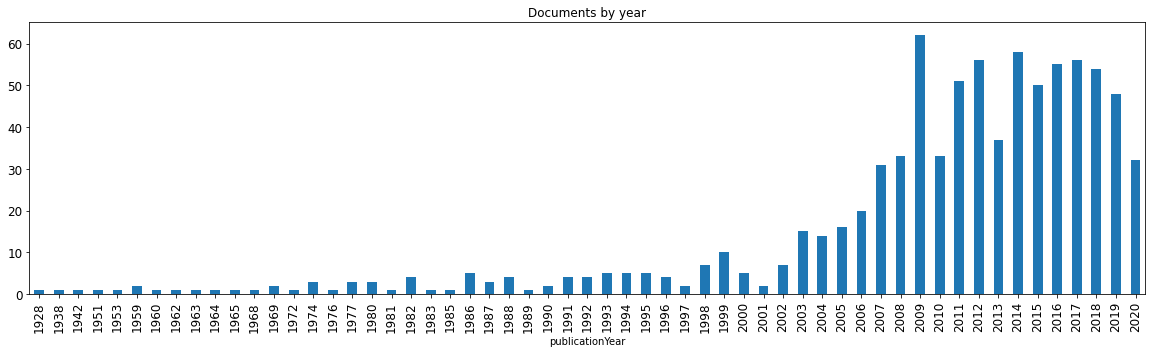

In [18]:
# Group the data by publication year and the aggregated number of ids into a bar chart
df.groupby(['publicationYear'])['id'].agg('count').plot.bar(title='Documents by year', figsize=(20, 5), fontsize=12); 

# Read more about Pandas dataframe plotting here: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

And now let's look at the total page numbers by year.

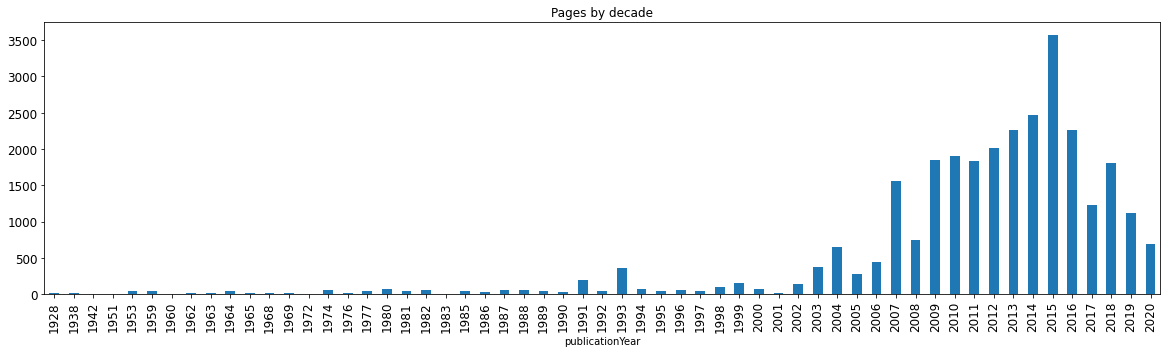

In [19]:
# Group the data by publication year and aggregated sum of the page counts into a bar chart

df.groupby(['publicationYear'])['pageCount'].agg('sum').plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12);